In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [3]:
A1 = np.dot(X,W1)+B1

In [4]:
A1.shape

(3,)

In [5]:
def sigmoid(x):
    return 1/1+np.exp(-x)

In [6]:
Z1 = sigmoid(A1)

In [7]:
W2 = np.array([[0.1,0.2],[0.2,0.3],[0.3,0.4]])
B2 = np.array([0.1,0.2])
A2 = np.dot(Z1,W2)+B2

In [8]:
A2.shape

(2,)

In [9]:
Z2 = sigmoid(A2)

In [10]:
from sklearn.datasets import fetch_mldata

In [12]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [13]:
(X_train,t_train),(X_test,t_test) = load_mnist(flatten=True,normalize=False)

In [14]:
print(X_train.shape)

(60000, 784)


In [18]:
from PIL import  Image

In [19]:
img = X_train[0]

In [20]:
def image_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [21]:
img = img.reshape(28,28)

In [23]:
image_show(img)

In [26]:
def mean_squared_error(y,t):
    return 0.5*(np.sum((y-t)**2))

In [29]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] 
mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [30]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [31]:
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [33]:
X_train.shape

(60000, 784)

In [34]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [41]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [42]:
def function_1(x):
    return 0.01*x**2+0.1*x

In [43]:
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

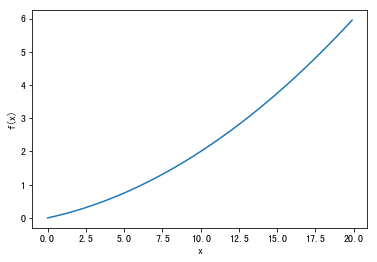

In [44]:
x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [46]:
numerical_diff(function_1,5)

0.1999999999990898

In [47]:
def function_2(x):
    return x[0]**2+x[1]**2

In [48]:
def numerical_diff(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    for i in range(x.size):
        tmp_val = x[i]
        x[i] = tmp_val+h
        fxh1 = f(x)
        
        x[i] = tmp_val-h
        fxh2 = f(x)
        
        grad[i] = (fxh1-fxh2)/(2*h)
        x[i] = tmp_val
    return grad

In [49]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_diff(f,x)
        x -= lr*grad
    return x

In [50]:
def function_2(x):
    return np.sum(x**2)

In [51]:
init_x = np.array([-3.0,4.0])

In [53]:
gradient_descent(function_2,init_x,lr=0.1,step_num=100)

array([-8.10452420e-11,  1.08060323e-10])

In [55]:
import sys, os 
sys.path.append(os.pardir) 
import numpy as np 
from common.functions import softmax, cross_entropy_error 
from common.gradient import numerical_gradient

In [56]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)
    def predict(self,x):
        return np.dot(x,self.W)
    def loss(self,x,t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [57]:
net = simpleNet()
print(net.W)

[[-0.08959623  0.08807213  0.28727498]
 [-0.07611597 -0.9853291  -0.19170237]]


In [58]:
x = np.array([0.6,0.9])
p = net.predict(x)

In [59]:
print(p)

[-1.22262111e-01 -8.33952911e-01 -1.67146268e-04]


In [60]:
np.argmax(p)

2

In [62]:
t = np.array([0,0,1])
print(net.loss(x,t))

0.8413367296127673


In [63]:
from common.functions import * 
from common.gradient import numerical_gradient

In [64]:
class TwoLayerNet:
    def __init__(self,input_size,hidden_size,output_size,weight_init_std=0.01):
        self.params ={}
        self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b2'] = np.zeros(output_size)
    
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b1'],self.params['b2']
        
        a1 = np.dot(x,W1)+b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2)+b2
        y = softmax(a2)
        
        return y

In [65]:
def loss(self,x,t):
    y = self.predict(x)
    return cross_entropy_error(y,t)

def accuracy(self,x,t):
    y = self.predict(x)
    y = np.argmax(y,axis=1)
    t = np.argmax(t,axis=1)
    
    accuracy = np.sum(y==t)/float(x.shape[0])
    return accuracy

In [66]:
def numerical_gradient(self,x,t):
    loss_W = lambda W:self.loss(x,t)
    
    grad = {}
    grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
    
    return grads

In [68]:
import numpy as np 
from dataset.mnist import load_mnist 
from two_layer_net import TwoLayerNet

In [73]:
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)
train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

In [ ]:
for i in range(iters_num):
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch,t_batch)
    
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)